# K Means Clustering


Laura Choque

This task focuses on unsupervised learning, where no labels are provided.
K-Means clustering groups data points based on similarity, making it ideal for discovering hidden patterns in financial data.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Numerical features derived from market behavior

Natural grouping based on volatility and returns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CODVEDA_TECH_LC/dataset_for_task/2StockPricesDataSet.csv")
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [ ]:
print("Shape:", df.shape)
print(df.columns)
df.info()

Shape: (497472, 7)
Index(['symbol', 'date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB


In [ ]:
df = df.copy()

df["date"] = pd.to_datetime(df["date"])
df = df.sort_values(["symbol", "date"])

In [ ]:
df["return"] = df.groupby("symbol")["close"].pct_change()

In [ ]:
df_returns = df.dropna(subset=["return"])

In [ ]:
features = df_returns.groupby("symbol").agg(
    mean_return=("return", "mean"),
    volatility=("return", "std"),
    max_return=("return", "max"),
    min_return=("return", "min"),
    avg_volume=("volume", "mean")
)

In [ ]:
features = features.dropna()
features.head()

,mean_return,volatility,max_return,min_return,avg_volume
symbol,,,,,
A,0.000306,0.015787,0.046480,-0.261216,2.192206e+06
AAL,0.000965,0.022389,0.112323,-0.108144,9.752269e+06
AAP,0.000096,0.019471,0.163345,-0.203439,1.137898e+06
AAPL,0.000860,0.014309,0.081982,-0.079927,4.515603e+07
ABBV,0.000753,0.016436,0.100739,-0.103288,8.412653e+06


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [ ]:
inertias = []
k_values = range(1, 11)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

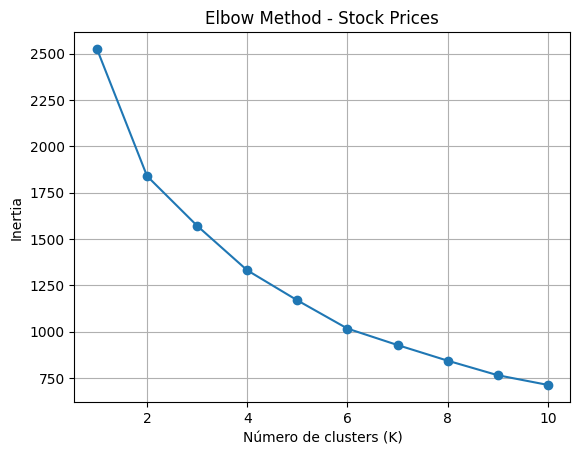

In [ ]:
plt.figure()
plt.plot(list(k_values), inertias, marker="o")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method - Stock Prices")
plt.grid(True)
plt.show()

In [ ]:
#USING K VALUE = 3
K = 3
kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

features_clustered = features.copy()
features_clustered["cluster"] = labels

In [ ]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

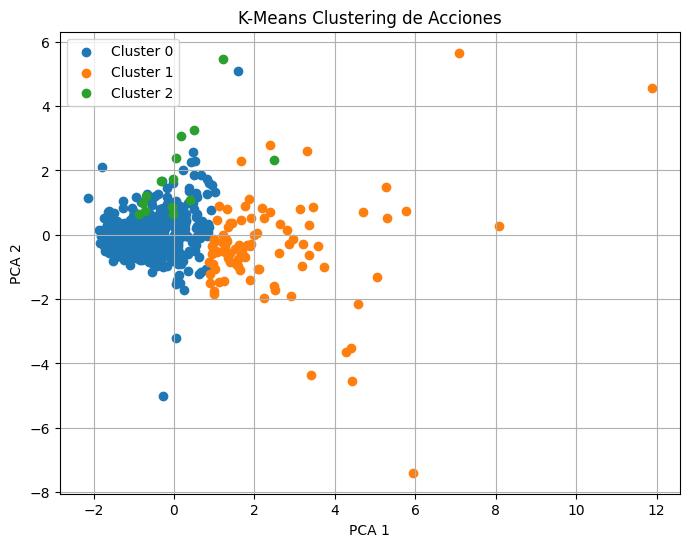

In [ ]:
plt.figure(figsize=(8,6))
for c in range(K):
    mask = labels == c
    plt.scatter(X_2d[mask, 0], X_2d[mask, 1], label=f"Cluster {c}")

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("K-Means Clustering de Acciones")
plt.legend()
plt.grid(True)
plt.show()

This figure presents a 2D visualization of the K-Means clustering results applied to the stock market dataset, using Principal Component Analysis (PCA) for dimensionality reduction.

Since the original feature space consists of multiple financial indicators (such as average return, volatility, extreme returns, and trading volume), PCA is used to project the high-dimensional data into two principal components (PCA 1 and PCA 2) while preserving most of the variance.

Each point in the plot represents a single stock, and the color indicates the cluster assignment produced by the K-Means algorithm.

In [ ]:
features_clustered.groupby("cluster").mean()

,mean_return,volatility,max_return,min_return,avg_volume
cluster,,,,,
0,0.000530,0.013857,0.082019,-0.087115,3.106797e+06
1,0.000045,0.023291,0.177877,-0.209362,4.767166e+06
2,0.000528,0.014355,0.086576,-0.080248,3.316350e+07


In [ ]:
for c in range(K):
    print(f"\nCluster {c}:")
    print(features_clustered[features_clustered["cluster"] == c].index[:15])


Cluster 0:
Index(['A', 'AAL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP',
       'ADSK', 'AEE', 'AEP', 'AES', 'AET'],
      dtype='object', name='symbol')

Cluster 1:
Index(['AAP', 'ADS', 'AKAM', 'ALXN', 'AMD', 'APA', 'APC', 'ARNC', 'BAX', 'BBY',
       'BHGE', 'BIIB', 'CAG', 'CELG', 'CF'],
      dtype='object', name='symbol')

Cluster 2:
Index(['AAPL', 'BAC', 'C', 'CMCSA', 'CSCO', 'F', 'FB', 'GE', 'INTC', 'MSFT',
       'MU', 'PFE', 'T', 'WFC'],
      dtype='object', name='symbol')
